# 有用的代码

## 1. 将原始 ai challenge 的数据集，按照图片的分类写进 AI_challenge_new 文件夹

In [16]:
import json
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def transfer_img(json_path, raw_path, target_path):
    # 把json文件读进来
    with open(json_path, 'r', encoding='utf8') as fp:
        json_data = json.load(fp)
    for sample in json_data:
        cla = sample['disease_class']
        image_id = sample['image_id']
        # 把对应的文件移动到对应的文件夹
        path_sample = os.path.join(raw_path, image_id)
        path_target_file = os.path.join(target_path, str(cla), image_id)
        shutil.copy(path_sample, path_target_file)

In [ ]:
# 转移验证和测试集数据
path_val_test = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge/AgriculturalDisease_validationset/images'
path_new_val_test = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_new/val_test'
path_val_test_json = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge/ai_challenger_pdr2018_validation_annotations_20181021.json'

transfer_img(path_val_test_json, path_val_test, path_new_val_test)

In [ ]:
path_train = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge/AgriculturalDisease_trainingset/images'
path_new_train = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_new/train'
path_train_json = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge/ai_challenger_pdr2018_train_annotations_20181021.json'

transfer_img(path_train_json, path_train, path_new_train)

## 2. 分析 AI challenge 数据集

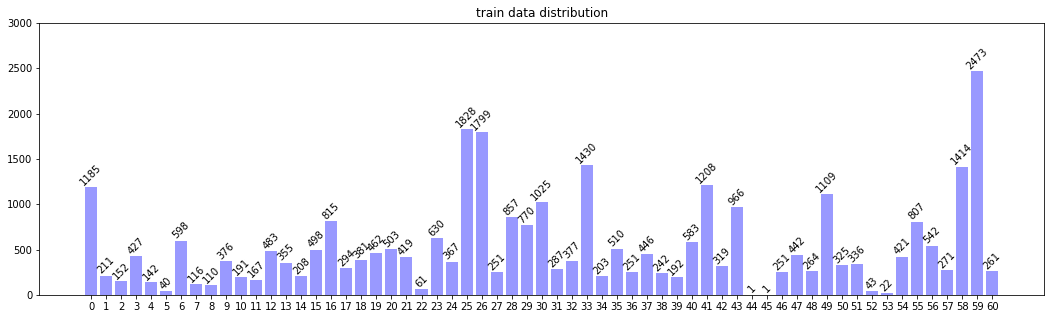

In [17]:
# 分析训练集数据
import matplotlib.pyplot as plt
import numpy as np

path_train = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_new/train'
count = []
for i in range(61):
    pth = os.path.join(path_train, str(i))
    count.append(len(os.listdir(pth)))
X = [i for i in range(61)]
Y = count
plt.figure(figsize=(18,5))
plt.bar(X, Y, color='blue', width=0.8, alpha=0.4)
plt.xticks(np.arange(0, 61, 1))
plt.yticks(np.arange(0, 3500, 500))
plt.title('train data distribution')
for a,b in zip(X,Y): 
    plt.text(a, b, '%d' % b, ha='center', va= 'bottom', rotation=45, fontsize=10) 
plt.show()

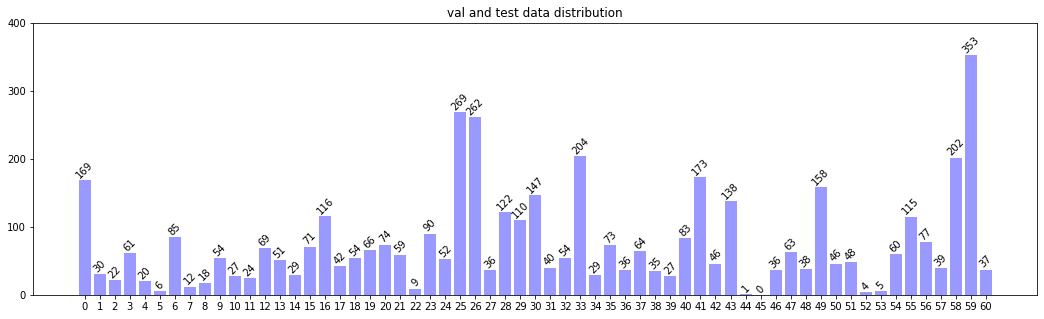

In [16]:
# 验证集和测试集数据
path_train = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_new/val_test'
count = []
for i in range(61):
    pth = os.path.join(path_train, str(i))
    count.append(len(os.listdir(pth)))
X = [i for i in range(61)]
Y = count
plt.figure(figsize=(18,5))
plt.bar(X, Y, color='blue', width=0.8, alpha=0.4)
plt.xticks(np.arange(0, 61, 1))
plt.yticks(np.arange(0, 500, 100))
plt.title('val and test data distribution')
for a,b in zip(X,Y): 
    plt.text(a, b, '%d' % b, ha='center', va= 'bottom', rotation=45, fontsize=10) 
plt.show()



In [ ]:
# 有复杂背景的 39, 30, 6
ai_challenge_class_table = {0:  'apple healthy（苹果健康）',
                            1:  'Apple_Scab general（苹果黑星病一般）',
                            2:  'Apple_Scab serious（苹果黑星病严重）',
                            6:  'Cherry healthy（樱桃健康）',
                            7:  'Cherry_Powdery Mildew  general（樱桃白粉病一般）',
                            8:  'Cherry_Powdery Mildew  serious（樱桃白粉病严重）',
                            17: 'Grape heathy（葡萄健康）',
                            18: 'Grape Black Rot Fungus general（葡萄黑腐病一般）',
                            19: 'Grape Black Rot Fungus serious（葡萄黑腐病严重）',
                            27: 'Peach healthy（桃健康）',
                            28: 'Peach_Bacterial Spot general（桃疮痂病一般）',
                            29: 'Peach_Bacterial Spot  serious（桃疮痂病严重）',
                            33: 'Potato healthy（马铃薯健康）',
                            34: 'Potato_Early Blight Fungus general（马铃薯早疫病一般）',
                            35: 'Potato_Early Blight Fungus serious（马铃薯早疫病严重）',
                            36: 'Potato_Late Blight Fungus general（马铃薯晚疫病一般）',
                            37: 'Potato_Late Blight Fungus  serious（马铃薯晚疫病严重）',
                            38: 'Strawberry healthy（草莓健康）',
                            39: 'Strawberry_Scorch general（草莓叶枯病一般）',
                            40: 'Strawberry_Scorch serious（草莓叶枯病严重）',
                            41: 'Tomato healthy（番茄健康）',
                            46: 'Tomato_Early Blight Fungus general（番茄早疫病一般）',
                            47: 'Tomato_Early Blight Fungus  serious（番茄早疫病严重）',
                            48: 'Tomato_Late Blight Water Mold  general（番茄晚疫病菌一般）',
                            49: 'Tomato_Late Blight Water Mold serious（番茄晚疫病菌严重）',
                            50: 'Tomato_Leaf Mold Fungus general（番茄叶霉病一般）',
                            51: 'Tomato_Leaf Mold Fungus serious（番茄叶霉病严重）',
                            54: 'Tomato_Septoria Leaf Spot Fungus  general（番茄斑枯病一般）',
                            55: 'Tomato_Septoria Leaf Spot Fungus  serious（番茄斑枯病严重）',
                            56: 'Tomato Spider Mite Damage general（番茄红蜘蛛损伤一般）',
                            57: 'Tomato Spider Mite Damage serious（番茄红蜘蛛损伤严重）',
                            58: 'Tomato YLCV Virus general（番茄黄化曲叶病毒病一般）',
                            59: 'Tomato YLCV Virus  serious（番茄黄化曲叶病毒病严重）'}

## 3. 构建 B 域数据集

In [37]:
useful_cla = {'apple_healthy' : [0],
              'apple_scab': [1, 2],
              'cherry_healthy': [6],
              'cherry_powdery mildew': [7,8],
              'grape_healthy': [17],
              'grape_black_rot': [18,19],
              'peach_healthy': [27],
              'peach_bacterial_spot': [28,29],
              'potato_healthy': [33],
              'potato_early_blight':[34,35],
              'potato_late_blight':[36,37],
              'strawberry_healthy':[38],
              'strawberry_scorch': [39, 40],
              'tomato_healthy':[41],
              'tomato_early_blight':[46,47],
              'tomato_late_blight':[48,49],
              'tomato_leaf_mold':[50,51],
              'tomato_septoria_leaf_spot':[54,55],
              'tomato_spider_mite_damage':[56,57],
              'tomato_YLCV_virus':[58,59]
              } 

In [44]:
import os
import shutil
path_new = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_B_domain/train'
path_old = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_new/train'
for class_name, lis in useful_cla.items():
    new_file_name = os.path.join(path_new, class_name)
    os.mkdir(new_file_name)
    for c in lis:
        old_file_name = os.path.join(path_old, str(c))

        for image_id in os.listdir(old_file_name):
            img_path_old = os.path.join(old_file_name, image_id)
            img_path_new = os.path.join(new_file_name, image_id)
            shutil.copy(img_path_old, img_path_new)


apple_healthy    [0]
apple_scab    [1, 2]
cherry_healthy    [6]
cherry_powdery mildew    [7, 8]
grape_healthy    [17]
grape_black_rot    [18, 19]
peach_healthy    [27]
peach_bacterial_spot    [28, 29]
potato_healthy    [33]
potato_early_blight    [34, 35]
potato_late_blight    [36, 37]
strawberry_healthy    [38]
strawberry_scorch    [39, 40]
tomato_healthy    [41]
tomato_early_blight    [46, 47]
tomato_late_blight    [48, 49]
tomato_leaf_mold    [50, 51]
tomato_septoria_leaf_spot    [54, 55]
tomato_spider_mite_damage    [56, 57]
tomato_YLCV_virus    [58, 59]


In [46]:
# val and test dataset
path_new = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_B_domain/val_test'
path_old = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_new/val_test'
for class_name, lis in useful_cla.items():
    new_file_name = os.path.join(path_new, class_name)
    os.mkdir(new_file_name)
    for c in lis:
        old_file_name = os.path.join(path_old, str(c))

        for image_id in os.listdir(old_file_name):
            img_path_old = os.path.join(old_file_name, image_id)
            img_path_new = os.path.join(new_file_name, image_id)
            shutil.copy(img_path_old, img_path_new)

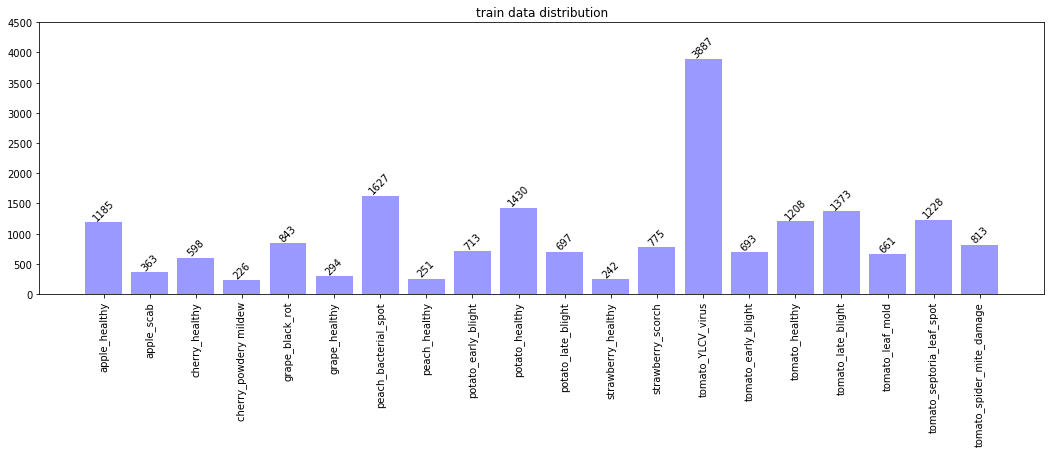

In [48]:
# 查看 B 域训练集, 19107 张图片
path_train = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_B_domain/train'
count = []

classes = os.listdir(path_train)
classes.sort()

for cla in classes:
    pth = os.path.join(path_train, cla)
    count.append(len(os.listdir(pth)))

X = classes
Y = count
plt.figure(figsize=(18,5))
plt.bar(X, Y, color='blue', width=0.8, alpha=0.4)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 5000, 500))
plt.title('train data distribution')
for a,b in zip(X,Y): 
    plt.text(a, b, '%d' % b, ha='center', va= 'bottom', rotation=45, fontsize=10) 
plt.show()


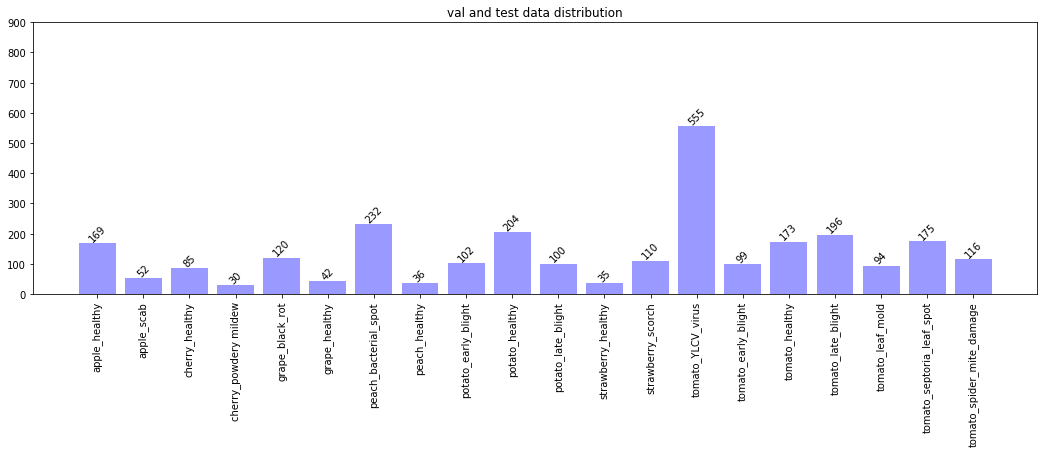

In [6]:
# 查看 B 域验证和测试集, 2725 张图片
path_val = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_B_domain/val_test'
count = []

classes = os.listdir(path_val)
classes.sort()

for cla in classes:
    pth = os.path.join(path_val, cla)
    count.append(len(os.listdir(pth)))

X = classes
Y = count
plt.figure(figsize=(18,5))
plt.bar(X, Y, color='blue', width=0.8, alpha=0.4)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1000, 100))
plt.title('val and test data distribution')
for a,b in zip(X,Y): 
    plt.text(a, b, '%d' % b, ha='center', va= 'bottom', rotation=45, fontsize=10) 
plt.show()

## 4.制作 B 域数据集 h5 文件
压缩所有图片到 3 256 256, 如果数据比较简单，就加一些高斯噪声

In [17]:
import numpy as np
import os
import cv2 as cv
import h5py

In [38]:
# 20 类在 A 域种对应的标号
class_name = {'apple_healthy': 3,
              'apple_scab': 0,
              'cherry_healthy': 6,
              'cherry_powdery mildew': 5,
              'grape_black_rot': 11,
              'grape_healthy': 14,
              'peach_bacterial_spot': 16,
              'peach_healthy': 17,
              'potato_early_blight': 20,
              'potato_healthy': 22,
              'potato_late_blight': 21,
              'strawberry_healthy': 27,
              'strawberry_scorch': 26,
              'tomato_YLCV_virus': 35,
              'tomato_early_blight':29,
              'tomato_healthy':37,
              'tomato_late_blight':30,
              'tomato_leaf_mold':31,
              'tomato_septoria_leaf_spot': 32,
              'tomato_spider_mite_damage': 33}

In [39]:
def read_imgs(x_data, y_data, file_dir, total_num):
    '''
    从文件夹中读取文件到 x_data, y_data。
    '''
    img_count = 0
    for cla in sorted(class_name.keys()):  # 这里一定要排序
        for file_name in os.listdir(os.path.join(file_dir, cla)):
            print("\rreading...:{:d}/{:d}".format(img_count + 1, total_num),
                  end='')
            file_path = os.path.join(file_dir, cla, file_name)
            img = cv.imread(file_path)  # 默认是 BGR 格式
            img = cv.resize(img, (256, 256)) # 先压缩大小
            # img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # 转化为 RGB 格式
            # 变为 (3, 256, 256) 的 RGB 图像
            img = np.array([img[:, :, 2], img[:, :, 1], img[:, :, 0]])
            
            x_data[img_count, :, :, :] = img
            y_data[img_count] = class_name[cla]
            img_count += 1
    
def save_file(save_path, x_data, y_data):
    '''
    保存数据文件
    '''
    with h5py.File(save_path, 'w') as f_name:
        f_name['X'] = x_data
        f_name['Y'] = y_data


In [40]:
path_train = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_B_domain/train'


In [41]:
# 得到训练数据集
x_data = np.zeros([19107, 3, 256, 256], dtype=np.uint8)  # 有 num 张图片
y_data = np.zeros([19107], dtype=np.uint8)
read_imgs(x_data, y_data, path_train, 19107)
save_path = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b/train_data.h5'
save_file(save_path, x_data, y_data)

reading...:19107/19107

In [47]:
# 得到验证集和测试集的 h5 文件
path_val_test = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_B_domain/val_test'
save_path_val = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b/val_data.h5'
save_path_test = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b/test_data.h5'

num = 2725
x_data = np.zeros([num, 3, 256, 256], dtype=np.uint8)  # 有 num 张图片
y_data = np.zeros([num], dtype=np.uint8)  
read_imgs(x_data, y_data, path_val_test, num)  # 不用函数返回的原因是: 少一次拷贝

# 随机打乱 x_data y_data, 固定随机数种子，保证每次都一样
seq = list(range(num))
np.random.seed(1)
np.random.shuffle(seq)
num_val = int(num / 2)
num_test = int(num - num_val)
# 构建验证数据
x_val_data = np.zeros([num_val, 3, 256, 256], dtype=np.uint8)
y_val_data = np.zeros([num_val], dtype=np.uint8)
for i in range(num_val):
    x_val_data[i] = x_data[seq[i]]
    y_val_data[i] = y_data[seq[i]]

# 构建测试数据
x_test_data = np.zeros([num_test, 3, 256, 256], dtype=np.uint8)
y_test_data = np.zeros([num_test], dtype=np.uint8)
for i in range(num_test):
    x_test_data[i] = x_data[seq[i + num_val]]
    y_test_data[i] = y_data[seq[i + num_val]]
# 保存为 h5 文件
print("\nsaving...")
save_file(save_path_val, x_val_data, y_val_data)
save_file(save_path_test, x_test_data, y_test_data)
print("finished!")

reading...:2725/2725
saving...
finished!


## 分析 B 域的验证集合和测试集的数据分布,分布是比较相似的，可以放心的测试

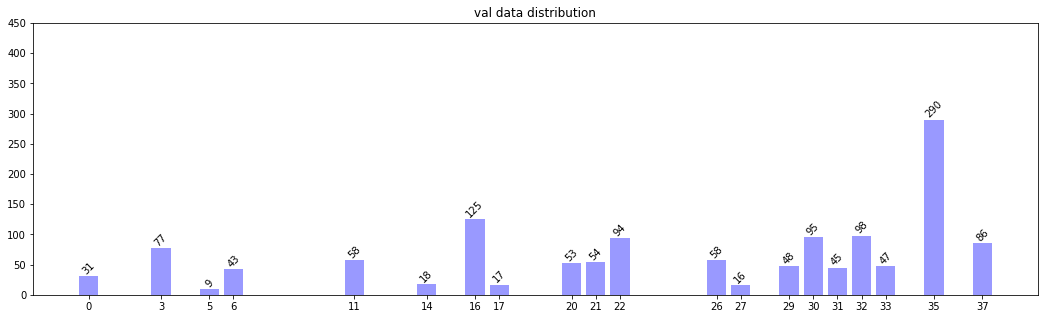

In [25]:
save_path_val = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b/val_data.h5'
with h5py.File(save_path_val, 'r') as f_name:
    xx = f_name['X']
    yy = f_name['Y'] 
    # 统计 
    dic = {}
    for c in yy:
        if c in dic.keys():
            dic[c] += 1
        else:
            dic[c] = 1
X = sorted(dic.keys())
Y = [dic[k] for k in X]
plt.figure(figsize=(18,5))
plt.bar(X, Y, color='blue', width=0.8, alpha=0.4)
plt.xticks(X)
plt.yticks(np.arange(0, 500, 50))
plt.title('val data distribution')
for a,b in zip(X,Y): 
    plt.text(a, b, '%d' % b, ha='center', va= 'bottom', rotation=45, fontsize=10) 
plt.show()

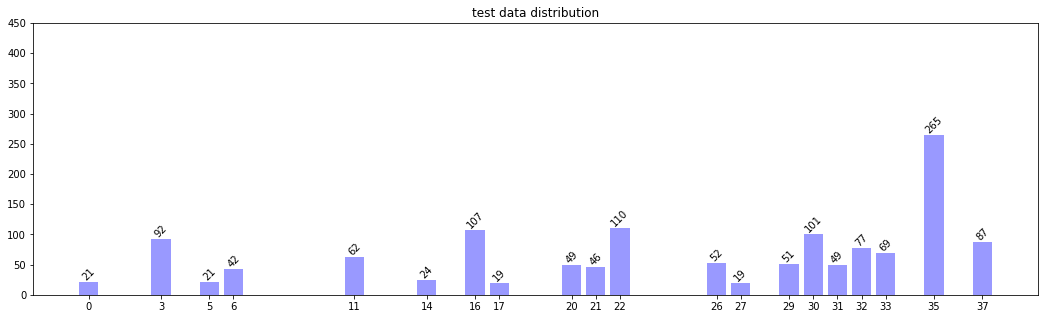

In [24]:
save_path_val = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b/test_data.h5'
with h5py.File(save_path_val, 'r') as f_name:
    xx = f_name['X']
    yy = f_name['Y'] 
    # 统计 
    dic = {}
    for c in yy:
        if c in dic.keys():
            dic[c] += 1
        else:
            dic[c] = 1
X = sorted(dic.keys())
Y = [dic[k] for k in X]
plt.figure(figsize=(18,5))
plt.bar(X, Y, color='blue', width=0.8, alpha=0.4)
plt.xticks(X)
plt.yticks(np.arange(0, 500, 50))
plt.title('test data distribution')
for a,b in zip(X,Y): 
    plt.text(a, b, '%d' % b, ha='center', va= 'bottom', rotation=45, fontsize=10) 
plt.show()

In [ ]:
[ 21,   0,   0,  92,   0,  21,  42,   0,   0,   0,   0,  62,   0,
         0,  24,   0, 107,  19,   0,   0,  49,  46, 110,   0,   0,   0,
        52,  19,   0,  51, 101,  49,  77,  69,   0, 265,   0,  87]

In [ ]:
save_path_test = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b/test_data.h5'

## 5. 分析 Plant Village 数据集

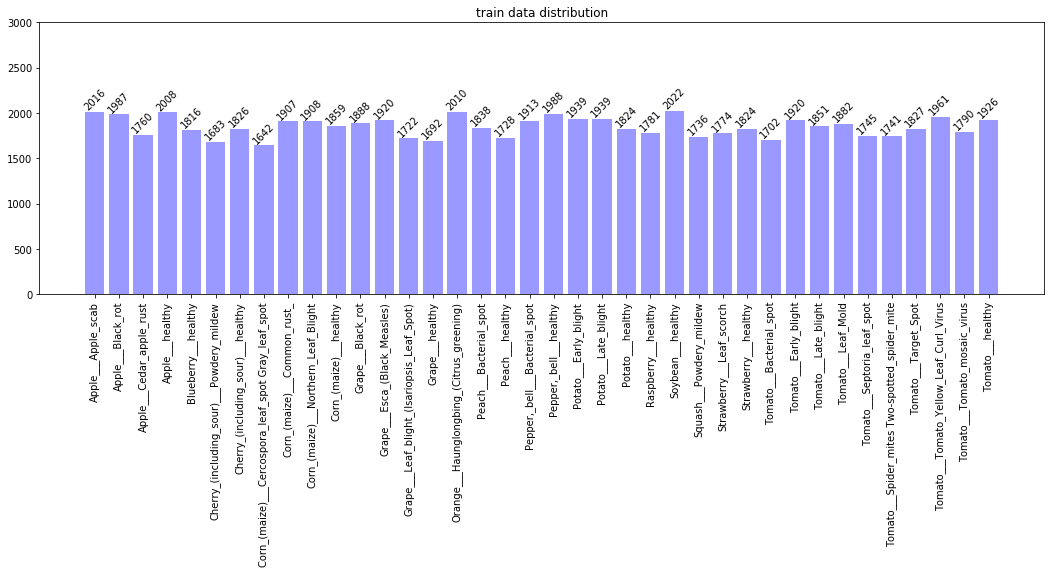

In [35]:
# 分析训练集数据
import matplotlib.pyplot as plt
import numpy as np

path_train = '/media/lingang/d/chris/graduate_thesis/raw_dataset/plant_data/train'
count = []

classes = os.listdir(path_train)
classes.sort()

for cla in classes:
    pth = os.path.join(path_train, cla)
    count.append(len(os.listdir(pth)))

X = classes
Y = count
plt.figure(figsize=(18,5))
plt.bar(X, Y, color='blue', width=0.8, alpha=0.4)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 3500, 500))
plt.title('train data distribution')
for a,b in zip(X,Y): 
    plt.text(a, b, '%d' % b, ha='center', va= 'bottom', rotation=45, fontsize=10) 
plt.show()

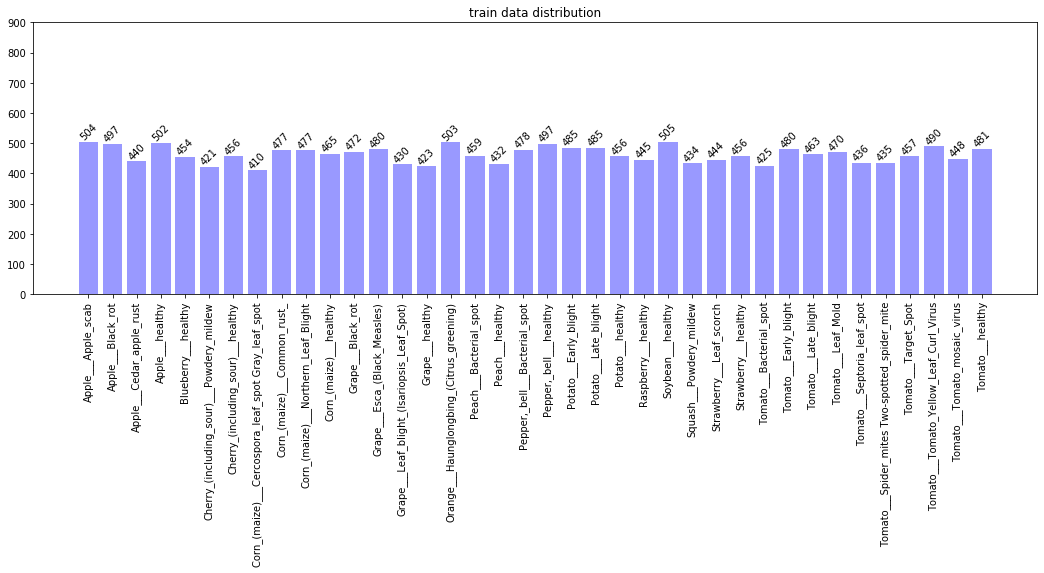

In [34]:
# 分析训练集数据
import matplotlib.pyplot as plt
import numpy as np

path_train = '/media/lingang/d/chris/graduate_thesis/raw_dataset/plant_data/valid'
count = []

classes = os.listdir(path_train)
classes.sort()

for cla in classes:
    pth = os.path.join(path_train, cla)
    count.append(len(os.listdir(pth)))

X = classes
Y = count
plt.figure(figsize=(18,5))
plt.bar(X, Y, color='blue', width=0.8, alpha=0.4)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1000, 100))
plt.title('train data distribution')
for a,b in zip(X,Y): 
    plt.text(a, b, '%d' % b, ha='center', va= 'bottom', rotation=45, fontsize=10) 
plt.show()

In [20]:
# 我们定义的类别
path = '/media/lingang/d/chris/graduate_thesis/raw_dataset/plant_data/train'
sorted(os.listdir(path))
domain_A_class = {
    'Apple___Apple_scab': 0,
    'Apple___Black_rot': 1,
    'Apple___Cedar_apple_rust': 2,
    'Apple___healthy': 3,
    'Blueberry___healthy': 4,
    'Cherry_(including_sour)___Powdery_mildew': 5,
    'Cherry_(including_sour)___healthy': 6,
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
    'Corn_(maize)___Common_rust_': 8,
    'Corn_(maize)___Northern_Leaf_Blight': 9,
    'Corn_(maize)___healthy': 10,
    'Grape___Black_rot': 11,
    'Grape___Esca_(Black_Measles)': 12,
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)':13,
    'Grape___healthy':14,
    'Orange___Haunglongbing_(Citrus_greening)':15,
    'Peach___Bacterial_spot':16,
    'Peach___healthy':17,
    'Pepper,_bell___Bacterial_spot':18,
    'Pepper,_bell___healthy':19,
    'Potato___Early_blight':20,
    'Potato___Late_blight':21,
    'Potato___healthy':22,
    'Raspberry___healthy':23,
    'Soybean___healthy':24,
    'Squash___Powdery_mildew':25,
    'Strawberry___Leaf_scorch':26,
    'Strawberry___healthy':27,
    'Tomato___Bacterial_spot':28,
    'Tomato___Early_blight':29,
    'Tomato___Late_blight':30,
    'Tomato___Leaf_Mold':31,
    'Tomato___Septoria_leaf_spot':32,
    'Tomato___Spider_mites Two-spotted_spider_mite':33,
    'Tomato___Target_Spot':34,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus':35,
    'Tomato___Tomato_mosaic_virus':36,
    'Tomato___healthy':37}

## 查看网络结构, 参数大小

In [3]:
import torch
from model.inceptionv4 import inceptionv4
from model.mobilenetv2 import mobilenetv2
from model.resnet import resnet18
from model.shufflenetv2 import shufflenetv2
from model.vgg import vgg9_bn
from torchsummary import summary
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = vgg9_bn()
net.to(device)
# print(net)
summary(net, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             896
       BatchNorm2d-2         [-1, 32, 256, 256]              64
              ReLU-3         [-1, 32, 256, 256]               0
         MaxPool2d-4         [-1, 32, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          18,496
       BatchNorm2d-6         [-1, 64, 128, 128]             128
              ReLU-7         [-1, 64, 128, 128]               0
         MaxPool2d-8           [-1, 64, 64, 64]               0
            Conv2d-9          [-1, 128, 64, 64]          73,856
      BatchNorm2d-10          [-1, 128, 64, 64]             256
             ReLU-11          [-1, 128, 64, 64]               0
        MaxPool2d-12          [-1, 128, 32, 32]               0
           Conv2d-13          [-1, 256, 32, 32]         295,168
      BatchNorm2d-14          [-1, 256,

In [12]:
net = shufflenetv2()
net.to(device)
# print(net)
summary(net, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 24, 256, 256]             672
       BatchNorm2d-2         [-1, 24, 256, 256]              48
            Conv2d-3         [-1, 24, 128, 128]             240
       BatchNorm2d-4         [-1, 24, 128, 128]              48
            Conv2d-5         [-1, 24, 128, 128]             600
       BatchNorm2d-6         [-1, 24, 128, 128]              48
              ReLU-7         [-1, 24, 128, 128]               0
            Conv2d-8         [-1, 24, 256, 256]             600
       BatchNorm2d-9         [-1, 24, 256, 256]              48
             ReLU-10         [-1, 24, 256, 256]               0
           Conv2d-11         [-1, 24, 128, 128]             240
      BatchNorm2d-12         [-1, 24, 128, 128]              48
           Conv2d-13         [-1, 24, 128, 128]             600
      BatchNorm2d-14         [-1, 24, 1

In [13]:
net = resnet18()
net.to(device)
# print(net)
summary(net, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             864
       BatchNorm2d-2         [-1, 32, 256, 256]              64
              ReLU-3         [-1, 32, 256, 256]               0
            Conv2d-4         [-1, 64, 256, 256]          18,432
       BatchNorm2d-5         [-1, 64, 256, 256]             128
              ReLU-6         [-1, 64, 256, 256]               0
            Conv2d-7         [-1, 64, 256, 256]          36,864
       BatchNorm2d-8         [-1, 64, 256, 256]             128
            Conv2d-9         [-1, 64, 256, 256]           2,048
      BatchNorm2d-10         [-1, 64, 256, 256]             128
       BasicBlock-11         [-1, 64, 256, 256]               0
           Conv2d-12         [-1, 64, 256, 256]          36,864
      BatchNorm2d-13         [-1, 64, 256, 256]             128
             ReLU-14         [-1, 64, 2

In [14]:
net = mobilenetv2()
net.to(device)
# print(net)
summary(net, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 258, 258]             128
       BatchNorm2d-2         [-1, 32, 258, 258]              64
             ReLU6-3         [-1, 32, 258, 258]               0
            Conv2d-4         [-1, 32, 258, 258]           1,056
       BatchNorm2d-5         [-1, 32, 258, 258]              64
             ReLU6-6         [-1, 32, 258, 258]               0
            Conv2d-7         [-1, 32, 258, 258]             320
       BatchNorm2d-8         [-1, 32, 258, 258]              64
             ReLU6-9         [-1, 32, 258, 258]               0
           Conv2d-10         [-1, 16, 258, 258]             528
      BatchNorm2d-11         [-1, 16, 258, 258]              32
 LinearBottleNeck-12         [-1, 16, 258, 258]               0
           Conv2d-13         [-1, 96, 258, 258]           1,632
      BatchNorm2d-14         [-1, 96, 2

In [15]:
net = inceptionv4()
net.to(device)
# print(net)
summary(net, (3, 256, 256))

, 15]         196,608
     BatchNorm2d-329          [-1, 192, 15, 15]             384
            ReLU-330          [-1, 192, 15, 15]               0
     BasicConv2d-331          [-1, 192, 15, 15]               0
          Conv2d-332          [-1, 192, 15, 15]         258,048
     BatchNorm2d-333          [-1, 192, 15, 15]             384
            ReLU-334          [-1, 192, 15, 15]               0
     BasicConv2d-335          [-1, 192, 15, 15]               0
          Conv2d-336          [-1, 224, 15, 15]         301,056
     BatchNorm2d-337          [-1, 224, 15, 15]             448
            ReLU-338          [-1, 224, 15, 15]               0
     BasicConv2d-339          [-1, 224, 15, 15]               0
          Conv2d-340          [-1, 224, 15, 15]         351,232
     BatchNorm2d-341          [-1, 224, 15, 15]             448
            ReLU-342          [-1, 224, 15, 15]               0
     BasicConv2d-343          [-1, 224, 15, 15]               0
          Conv2d-3

## 我们提出的u-net的网络结构图

In [2]:
import torch
from torchsummary import summary
import torch.nn as nn
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [ ]:
class BasicConv2d(nn.Module):
    '''
    卷积 -> batchnorm -> 激活函数
    '''
    def __init__(self, input_channels, output_channels, **kwargs):
        super().__init__()
        self.conv = nn.Conv2d(input_channels, output_channels, **kwargs)
        self.bn = nn.BatchNorm2d(output_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class U-net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = BasicConv2d(3, 16, stride=1, kernel_size=3)
        self.conv2 = BasicConv2d(16, 16, stride=1, kernel_size=3)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = BasicConv2d(16, 32, stride=1, kernel_size=3)
        self.conv4 = BasicConv2d(32, 32, stride=1, kernel_size=3)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = BasicConv2d(32, 64, stride=1, kernel_size=3)
        self.conv6 = BasicConv2d(64, 64, stride=1, kernel_size=3)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv7 = BasicConv2d(64, 128, stride=1, kernel_size=3)
        self.conv8 = BasicConv2d(128, 128, stride=1, kernel_size=3)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv9 = BasicConv2d(128, 256, stride=1, kernel_size=3)
        self.conv10 = BasicConv2d(256, 256, stride=1, kernel_size=3)

        


    def forward(self, x):
        output = self.conv1(x)
        output = self.conv2_x(output)
        output = self.conv3_x(output)
        output = self.conv4_x(output)
        output = self.conv5_x(output)
        output = self.avg_pool(output)
        output = output.view(output.size(0), -1)  # batch_size * 256
        
        self.features_map = output.detach()
        
        output = self.fc(output)
        return output